In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df= pd.read_csv('/content/final2.csv')
print(len(df))
df.head()

2724


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Index
0,1.21,48,30.46,59,177.39,5.62,1
1,1.22,49,30.47,99,139.80,6.75,2
2,1.22,50,30.47,96,151.82,5.62,3
3,1.19,50,30.47,91,112.27,7.87,4
4,1.22,50,30.46,47,157.78,6.75,5


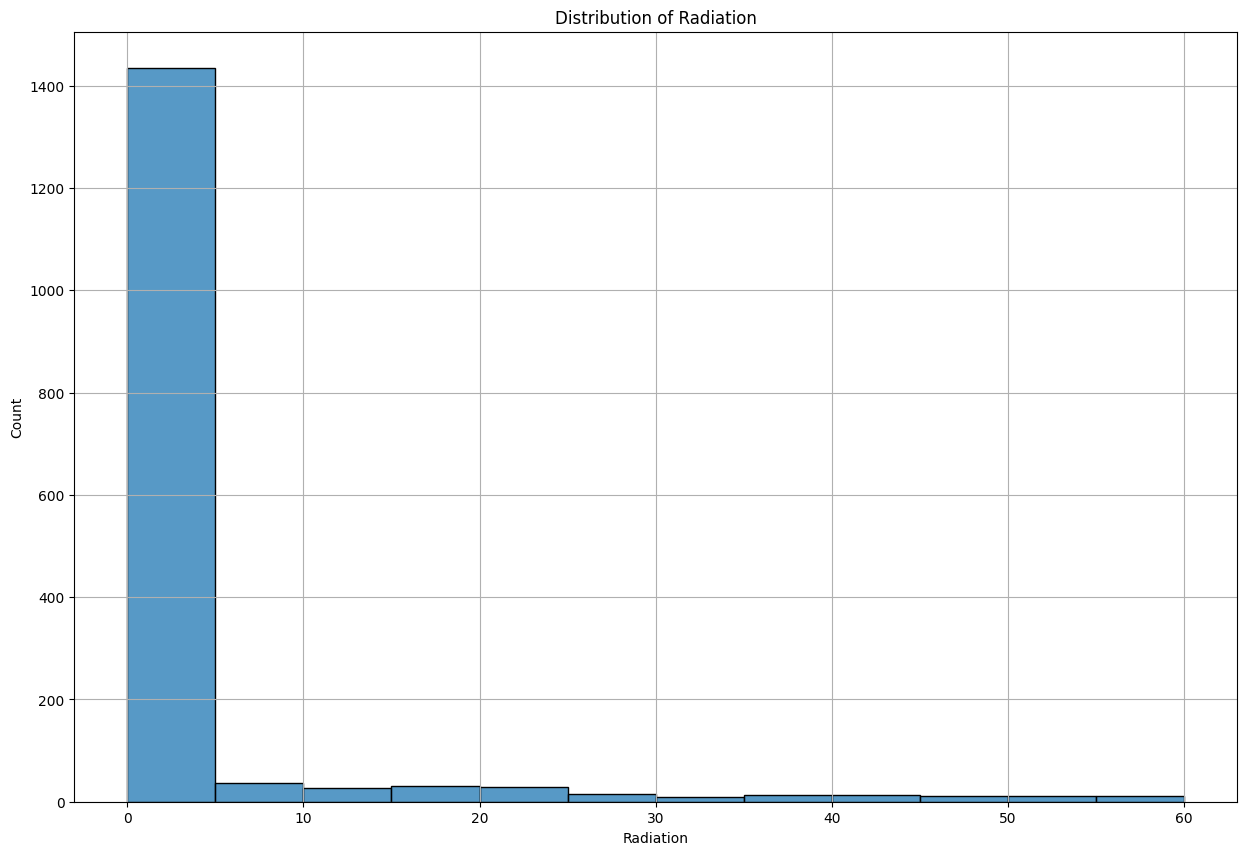

In [ ]:
# plot to see the radiation varience
plt.figure(figsize=(15, 10))
sns.histplot(df['Radiation'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Radiation")
plt.grid()
plt.show()

In [ ]:
df.index = pd.to_datetime(df.index)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Index
1970-01-01 00:00:00.000000000,1.21,48,30.46,59,177.39,5.62,1
1970-01-01 00:00:00.000000001,1.22,49,30.47,99,139.80,6.75,2
1970-01-01 00:00:00.000000002,1.22,50,30.47,96,151.82,5.62,3
1970-01-01 00:00:00.000000003,1.19,50,30.47,91,112.27,7.87,4
1970-01-01 00:00:00.000000004,1.22,50,30.46,47,157.78,6.75,5


In [ ]:
# coloum needed
required_cols=['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
df_final=df[required_cols]
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Index
1970-01-01 00:00:00.000000000,1.21,48,30.46,59,177.39,5.62,1
1970-01-01 00:00:00.000000001,1.22,49,30.47,99,139.80,6.75,2
1970-01-01 00:00:00.000000002,1.22,50,30.47,96,151.82,5.62,3
1970-01-01 00:00:00.000000003,1.19,50,30.47,91,112.27,7.87,4
1970-01-01 00:00:00.000000004,1.22,50,30.46,47,157.78,6.75,5


In [ ]:
df_final.isna().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df_final.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # 'radiation' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


Train X shape: (2171, 10, 6)
Train Y shape: (2171,)
Test X shape: (543, 10, 6)
Test Y shape: (543,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 8s 90ms/step - loss: 0.0643 - val_loss: 0.0453
Epoch 2/100
28/28 [==============================] - 2s 70ms/step - loss: 0.0445 - val_loss: 0.0248
Epoch 3/100
28/28 [==============================] - 2s 86ms/step - loss: 0.0302 - val_loss: 0.0175
Epoch 4/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0226 - val_loss: 0.0163
Epoch 5/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0205 - val_loss: 0.0092
Epoch 6/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0188 - val_loss: 0.0087
Epoch 7/100
28/28 [==============================] - 2s 74ms/step - loss: 0.0188 - val_loss: 0.0097
Epoch 8/100
28/28 [==============================] - 2s 90ms/step - loss: 0.0173 - val_loss: 0.0096
Epoch 9/100
28/28 [==============================] - 3s 106ms/step - loss: 0.0162 - val_loss: 0.0067
Epoch 10/100
28/28 [==============================] - 3s 115ms/step - loss: 0.0156 - val_loss: 0.00

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           69120     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

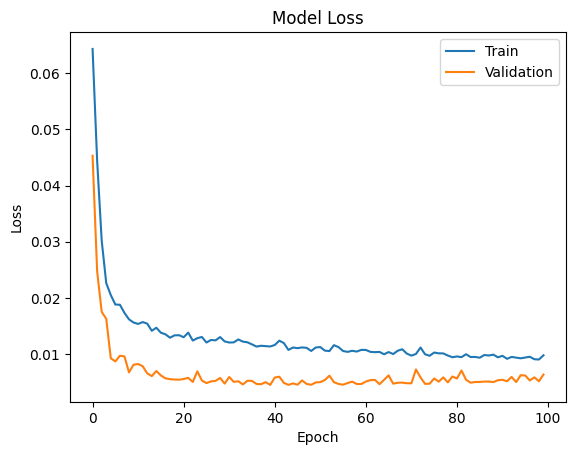

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# trainpredict = model.predict(train_x)
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

17/17 [==============================] - 1s 11ms/step
Mean Absolute Error (MAE): 0.05884674090959575
Mean Squared Error (MSE): 0.009287213121332266
Root Mean Squared Error (RMSE): 0.09637018792828136


In [ ]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_rad = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values
prediction = model.predict(test_x)
prediction_copies = np.repeat(prediction, 6, axis=-1)
predicted_rad = scaler.inverse_transform(prediction_copies)[:,0]

17/17 [==============================] - 0s 9ms/step


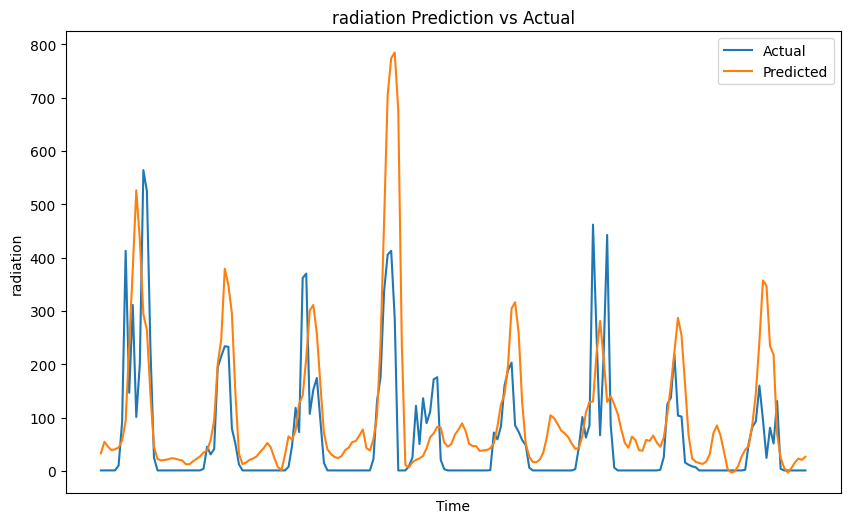

In [ ]:
# Plotting predicted and actual radiation
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-200:], true_rad[-200:], label='Actual')
plt.plot(df_final.index[-200:], predicted_rad[-200:], label='Predicted')
plt.title('radiation Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('radiation')
plt.legend()
plt.show()

In [ ]:
# test_y_copies
# true_rad
print(predicted_rad, true_rad)

543